###Import Libraries

In [58]:
!pip install statsmodels

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from sklearn.metrics import mean_squared_error
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

###Dataset

In [2]:
data=pd.read_csv("UK.Petrol.Prices.csv")

In [3]:
data.describe()

,Diesel (USD),difference,Number of Records,Petrol (USD)
count,881.000000,881.000000,882.0,881.000000
mean,115.614675,4.507320,1.0,111.107355
std,19.715905,2.958042,0.0,18.588151
min,76.408120,-2.534532,1.0,74.206577
25%,98.513787,2.152839,1.0,95.306029
50%,118.597998,4.209073,1.0,114.782386
75%,132.872053,5.914812,1.0,127.924651
max,148.037710,15.091384,1.0,142.172754


In [4]:
data.columns

Index(['Date', 'Diesel (USD)', 'difference', 'Number of Records',
       'Petrol (USD)'],
      dtype='object')

In [5]:
data.head()

,Date,Diesel (USD),difference,Number of Records,Petrol (USD)
0,09-06-2003,76.773394,2.183110,1,74.590284
1,16-06-2003,76.689054,2.219911,1,74.469143
2,23-06-2003,76.620546,2.196980,1,74.423566
3,30-06-2003,76.505260,2.152839,1,74.352421
4,07-07-2003,76.457376,2.173639,1,74.283737


In [6]:
data.tail()


,Date,Diesel (USD),difference,Number of Records,Petrol (USD)
877,30-03-2020,118.597998,6.145289,1,112.452709
878,06-04-2020,116.833354,6.598557,1,110.234797
879,13-04-2020,116.150812,6.884993,1,109.265819
880,20-04-2020,115.732573,7.099826,1,108.632747
881,NaN,NaN,NaN,1,NaN


In [8]:
data.isna()

,Date,Diesel (USD),difference,Number of Records,Petrol (USD)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
877,False,False,False,False,False
878,False,False,False,False,False
879,False,False,False,False,False
880,False,False,False,False,False


In [7]:
data.dropna()

,Date,Diesel (USD),difference,Number of Records,Petrol (USD)
0,09-06-2003,76.773394,2.183110,1,74.590284
1,16-06-2003,76.689054,2.219911,1,74.469143
2,23-06-2003,76.620546,2.196980,1,74.423566
3,30-06-2003,76.505260,2.152839,1,74.352421
4,07-07-2003,76.457376,2.173639,1,74.283737
...,...,...,...,...,...
876,23-03-2020,123.409485,3.764981,1,119.644504
877,30-03-2020,118.597998,6.145289,1,112.452709
878,06-04-2020,116.833354,6.598557,1,110.234797
879,13-04-2020,116.150812,6.884993,1,109.265819


In [16]:
data.rename(columns={"Diesel (USD)":"D"},inplace=True)
data.rename(columns={"Petrol (USD)":"P"},inplace=True)

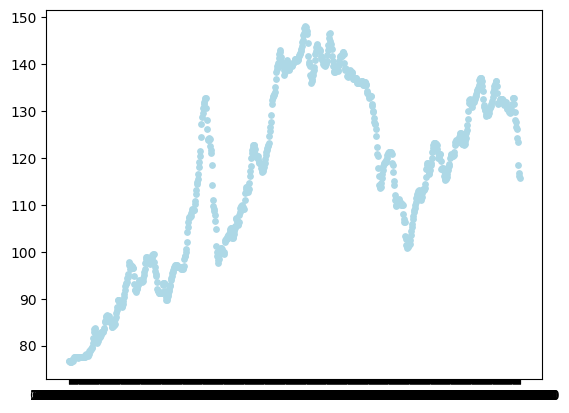

In [19]:
plt.scatter(data.Date.astype(str),data.D,color="lightblue",label="prices vs time",s=15)

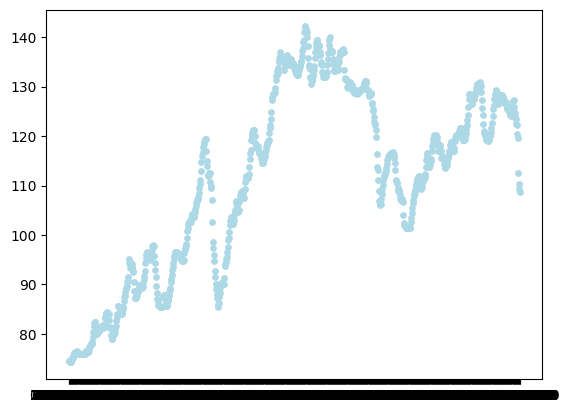

In [20]:
plt.scatter(data.Date.astype(str),data.P,color="lightblue",label="prices vs time",s=15)

In [24]:
sc=MinMaxScaler(feature_range=(0,1))
df1d=data[["D"]]
df1d=sc.fit_transform(np.array(df1d).reshape(-1,1))

In [25]:
sc=MinMaxScaler(feature_range=(0,1))
df2p=data[["P"]]
df2p=sc.fit_transform(np.array(df2p).reshape(-1,1))

In [27]:
int(len(df1d)*0.75)


661

In [28]:
len(df1d)

882

###Train test split

In [29]:
train1,test1=df1d[0:int(len(df1d)*0.75),:],df1d[int(len(df1d)*0.75):len(df1d),:1]

In [30]:
train2,test2=df2p[0:int(len(df2p)*0.75),:],df2p[int(len(df2p)*0.75):len(df2p),:1]

In [31]:
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
  return np.array(dataX),np.array(dataY)

In [34]:
time_step=100
x_train1,y_train1=create_dataset(train1,time_step)
x_test1,y_test1=create_dataset(test1,time_step)
x_train1=x_train1.reshape(x_train1.shape[0],x_train1.shape[1],1)
x_test1=x_test1.reshape(x_test1.shape[0],x_test1.shape[1],1)


In [35]:
time_step=100
x_train2,y_train2=create_dataset(train2,time_step)
x_test2,y_test2=create_dataset(test2,time_step)
x_train2=x_train2.reshape(x_train2.shape[0],x_train2.shape[1],1)
x_test2=x_test2.reshape(x_test2.shape[0],x_test2.shape[1],1)

###ARIMA

In [51]:
!pip install --upgrade patsy

In [52]:
!pip install statsmodels

In [53]:
!pip install --upgrade --no-deps statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 109.0 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.5
    Uninstalling statsmodels-0.13.5:
      Successfully uninstalled statsmodels-0.13.5


In [64]:
model=ARIMA(df1d,order=(5,1,0))
result=model.fit()
op1=result.forecast(steps=100)

In [65]:
op1

array([0.5363031 , 0.53140085, 0.52790341, 0.52540737, 0.52353805,
       0.52209327, 0.52097671, 0.52012507, 0.51948114, 0.51899449,
       0.51862544, 0.51834488, 0.51813154, 0.51796946, 0.51784641,
       0.517753  , 0.51768207, 0.51762821, 0.5175873 , 0.51755623,
       0.51753264, 0.51751473, 0.51750112, 0.51749079, 0.51748295,
       0.51747699, 0.51747246, 0.51746903, 0.51746642, 0.51746444,
       0.51746293, 0.51746179, 0.51746092, 0.51746026, 0.51745976,
       0.51745938, 0.5174591 , 0.51745888, 0.51745871, 0.51745858,
       0.51745849, 0.51745841, 0.51745836, 0.51745832, 0.51745829,
       0.51745826, 0.51745824, 0.51745823, 0.51745822, 0.51745821,
       0.5174582 , 0.5174582 , 0.5174582 , 0.51745819, 0.51745819,
       0.51745819, 0.51745819, 0.51745819, 0.51745819, 0.51745819,
       0.51745819, 0.51745819, 0.51745819, 0.51745818, 0.51745818,
       0.51745818, 0.51745818, 0.51745818, 0.51745818, 0.51745818,
       0.51745818, 0.51745818, 0.51745818, 0.51745818, 0.51745

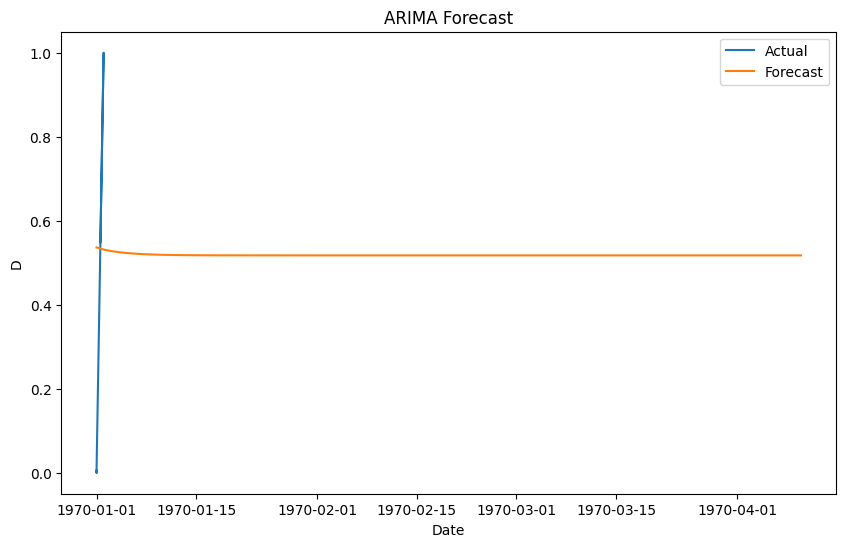

In [71]:

start_date = df1d[:, 0]
time_index = pd.date_range(start=start_date[0], periods=len(op1))
plt.figure(figsize=(10, 6))
plt.plot(df1d[:, 0], df1d[:, 0], label='Actual')
plt.plot(time_index, op1, label='Forecast')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('D')
plt.legend()
plt.show()



###LSTM

In [39]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")



In [40]:
model.fit(x_train1,y_train1,validation_data=(x_test1,y_test1),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 6s 230ms/step - loss: 0.1216 - val_loss: 0.0097
Epoch 2/100
9/9 [==============================] - 1s 124ms/step - loss: 0.0234 - val_loss: 0.0117
Epoch 3/100
9/9 [==============================] - 1s 121ms/step - loss: 0.0140 - val_loss: 0.0031
Epoch 4/100
9/9 [==============================] - 1s 120ms/step - loss: 0.0108 - val_loss: 0.0057
Epoch 5/100
9/9 [==============================] - 1s 144ms/step - loss: 0.0086 - val_loss: 0.0029
Epoch 6/100
9/9 [==============================] - 2s 175ms/step - loss: 0.0071 - val_loss: 0.0030
Epoch 7/100
9/9 [==============================] - 1s 122ms/step - loss: 0.0061 - val_loss: 0.0031
Epoch 8/100
9/9 [==============================] - 1s 124ms/step - loss: 0.0057 - val_loss: 0.0030
Epoch 9/100
9/9 [==============================] - 1s 122ms/step - loss: 0.0055 - val_loss: 0.0030
Epoch 10/100
9/9 [==============================] - 1s 121ms/step - loss: 0.0053 - val_loss: 0.0030
Epoch 11/

In [41]:
train_predict1=model.predict(x_train1)
test_predict1=model.predict(x_test1)

4/4 [==============================] - 0s 25ms/step


In [43]:
train_predict1=sc.inverse_transform(train_predict1)
test_predict1=sc.inverse_transform(test_predict1)

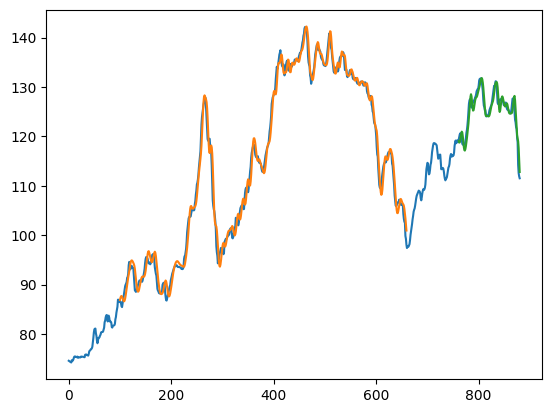

In [46]:
look_back=100
trainPredictPlot=np.empty_like(df1d)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict1)+look_back,:]=train_predict1
testPredictPlot=np.empty_like(df1d)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict1)+(look_back*2)+1:len(df1d)-1,:]=test_predict1
plt.plot(sc.inverse_transform(df1d))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [47]:
model.fit(x_train2,y_train2,validation_data=(x_test2,y_test2),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 1s 127ms/step - loss: 7.9902e-04 - val_loss: 7.1915e-04
Epoch 2/100
9/9 [==============================] - 1s 124ms/step - loss: 7.1585e-04 - val_loss: 7.1016e-04
Epoch 3/100
9/9 [==============================] - 1s 122ms/step - loss: 7.4518e-04 - val_loss: 7.2187e-04
Epoch 4/100
9/9 [==============================] - 1s 121ms/step - loss: 8.4866e-04 - val_loss: 0.0010
Epoch 5/100
9/9 [==============================] - 1s 121ms/step - loss: 8.5531e-04 - val_loss: 6.5727e-04
Epoch 6/100
9/9 [==============================] - 1s 122ms/step - loss: 7.9417e-04 - val_loss: 6.7926e-04
Epoch 7/100
9/9 [==============================] - 1s 121ms/step - loss: 7.2656e-04 - val_loss: 9.2797e-04
Epoch 8/100
9/9 [==============================] - 1s 145ms/step - loss: 7.3151e-04 - val_loss: 8.2722e-04
Epoch 9/100
9/9 [==============================] - 2s 172ms/step - loss: 7.1803e-04 - val_loss: 6.8489e-04
Epoch 10/100
9/9 [=======================

In [48]:
train_predict2=model.predict(x_train2)
test_predict2=model.predict(x_test2)

4/4 [==============================] - 0s 27ms/step


In [49]:
train_predict2=sc.inverse_transform(train_predict2)
test_predict2=sc.inverse_transform(test_predict2)

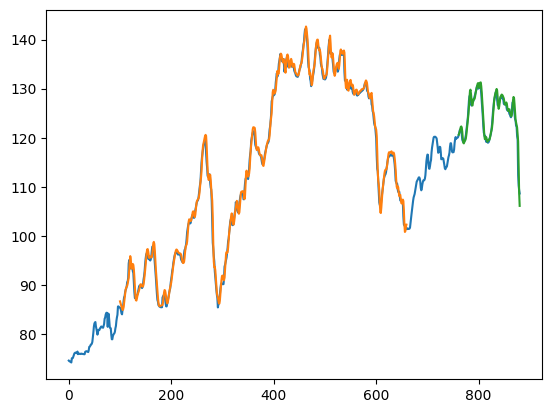

In [50]:
look_back=100
trainPredictPlot=np.empty_like(df2p)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict2)+look_back,:]=train_predict2
testPredictPlot=np.empty_like(df2p)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict2)+(look_back*2)+1:len(df2p)-1,:]=test_predict2
plt.plot(sc.inverse_transform(df2p))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
